In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_f_b(omegas, s_f, s_b, figsize=(4,6)):
    """Plot pre-computed forward and backward spectra
    """
    fig, ax = plt.subplots(1)
    ax.plot(omegas, np.abs(s0_f)**2)
    ax.plot(omegas, np.abs(s0_b)**2)
    ax.set_xlabel("$(\omega-\omega_1)/\Omega$")
    ax.set_ylabel("Transmission")
    ax.legend(("Forward", "Backward"))
    
    plt.show()

In [3]:
def sounas_transmission(omegas, gc, gd, gr, J, matched=True):
    """Implement the CMT T12 transmission from Sounas and Alu,
    ACS Photonics, 1 (2014).
    This assumes: 
     - CW and CCW ring modes at omega_l, coupled to two waveguides
     - dynamic modulation with frequency Omega
     - modes of different orders can be neglected, i.e. the modulation is 
     *not* matched with the FSR of the ring
     - the modulation only couples CW and CCW at omega_1, i.e. it's 
     perfectly momentum-matched for only that transition
     - RWA is *not* assumed! 
     
    All the variables below are in units of the modulation frequency Omega.
    Loss rates are such that the imaginary frequency is omega_l - 1j*gl 
    (as opposed to -1j*gl/2 in some conventions). As opposed to the Sounas
    paper, we use coupling constants rather than life-times.
    
    Parameters
    ----------
    omegas: NumPy array
        an array of monochromatic input frequencies over which the 
        transmission will be computed, centered at omega_l
    gc: float
        coupling to the channel waveguide
    gd: float
        coupling to the drop waveguide
    gd: float
        other losses (e.g. radiating to environment)
    J: complex
        effective coupling constant between the modes due to the modulation
        equal to omega_l*kappa/2 in Sounas paper
    matched: bool
        if True, the side-bands at omega_1 and omega_2 - Omega are 
        coupled (resonantly in the Floquet picture). If False, the modes at 
        omega_1 - Omega and omega_2 + Omega are coupled (non-resonantly).
        Note that matched=False would correspond to J=0 in RWA, but here
        a second-order effect is also included.
        
    Returns
    -------
    s0: NumPy array
        zero-side-band transmission amplitude
    """
    
    # Combined loss rate
    gt = gc + gd + gr + 1e-20
    
    if matched == True:
        t1 = omegas + 1j*gt - 2j*gc
        t2 = omegas - 1 + 1j*gt
        t3 = omegas + 1j*gt
        t4 = omegas - 1 + 1j*gt
        
        s0 = (t1*t2 - np.abs(J)**2)/(t3*t4 - np.abs(J)**2)
    
    elif matched == False:
        t1 = omegas + 1j*gt - 2j*gc
        t2 = omegas + 1 + 1j*gt
        t3 = omegas + 1j*gt
        t4 = omegas + 1 + 1j*gt
        
        s0 = (t1*t2 - np.abs(J)**2)/(t3*t4 - np.abs(J)**2)
    
    return s0

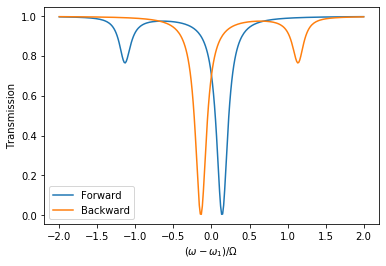

In [13]:
omegas = np.linspace(-2, 2, 301)

gc = 0.05
J = 0.4
gr = 0
# Drop port loss rate critical coupling condition when gr = 0
delta_om = np.sqrt(1 + (2*np.abs(J))**2) - 1
gd = gc/(1 + delta_om) 

s0_f = sounas_transmission(omegas, gc, gd, gr, J, matched=False)
s0_b = sounas_transmission(omegas, gc, gd, gr, J, matched=True)
plot_f_b(omegas, s0_f, s0_b)